In [41]:
%matplotlib inline
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2020-05-24 15:41:23,209: Credentials are already in use. The existing account in the session will be replaced.


Maximum Number of Ones on Range of Binary Function
=========================================

By extending the algorithm presented in `maxima_prototype_n_2.ipynb`, we can sort the graph of the function $f: [0,1]^n \to [0,1]^m$ for the number of ones in $y$. As an example, for the function used in this notebook, the graph is

| x   | y   |
|-----|-----|
| 000 | 000 |
| 001 | 100 |
| 010 | 000 |
| 011 | 110 |
| 100 | 010 |
| 101 | 110 |
| 110 | 010 |
| 111 | 100 |
.

Sorting by the number of ones in $y$ in descending order we have

| x   | y   |
|-----|-----|
| 101 | 110 |
| 011 | 110 |
| 001 | 100 |
| 100 | 010 |
| 110 | 010 |
| 111 | 100 |
| 000 | 000 |
| 010 | 000 |
.

This can be accomplished by recursively applying the algorithm presented in `maxima_prototype_n_2.ipynb` for pair of bits in $y$ and $c$. The more zeros a state has, the lower will be its probability.

In [42]:
circ = QuantumCircuit(9,9)

In [43]:
#Hadamard
for i in [6,7,8]:
    circ.h(i)

In [44]:
circ.barrier(range(9))

In [45]:
#Function
circ.cx(6,5)
circ.ccx(6,7,4)
circ.cx(8,4)

In [46]:
circ.barrier(range(9))

In [47]:
for i,j in zip([3,4,5],[0,1,2]):
    circ.x(i)
    circ.ch(i,j)
    circ.x(i)

In [48]:
circ.barrier(range(9))

In [49]:
circ.measure(range(9),range(9))

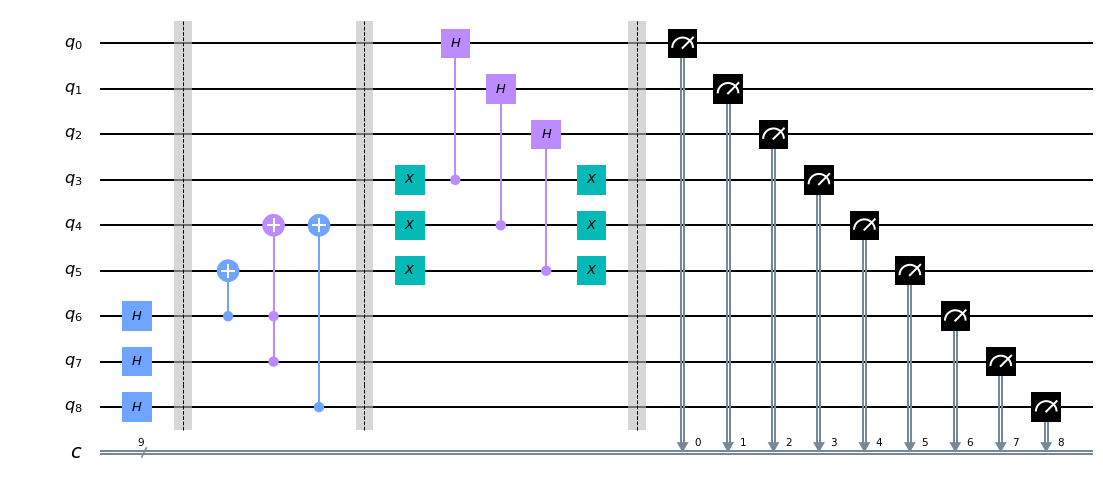

In [50]:
circ.draw("mpl")

In [51]:
nruns = 2048
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(circ, backend_sim, shots=nruns)
result_sim = job_sim.result()

In [52]:
counts = result_sim.get_counts(circ)

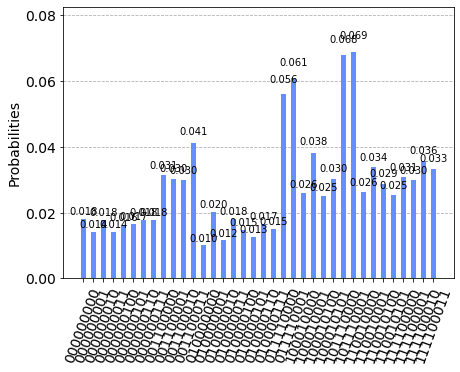

In [53]:
plot_histogram(counts)

Result. The first column of bits corresponds to $x$, then $y$ and finally $c$. Notice by sorting the result on counts we have also sorted for the number of ones in $y$.

In [57]:
result_raw = sorted(counts.items(), key=lambda x: x[1], reverse=True)
result = list(map(lambda x: [x[0][:3],x[0][3:6],x[0][6:],x[1]/nruns],result_raw))
result

[['101', '110', '001', 0.06884765625],
 ['101', '110', '000', 0.06787109375],
 ['011', '110', '001', 0.06103515625],
 ['011', '110', '000', 0.05615234375],
 ['001', '100', '011', 0.041015625],
 ['100', '010', '001', 0.0380859375],
 ['111', '100', '010', 0.03564453125],
 ['110', '010', '001', 0.03369140625],
 ['111', '100', '011', 0.033203125],
 ['001', '100', '000', 0.03125],
 ['111', '100', '000', 0.03076171875],
 ['100', '010', '101', 0.0302734375],
 ['001', '100', '001', 0.0302734375],
 ['001', '100', '010', 0.02978515625],
 ['111', '100', '001', 0.02978515625],
 ['110', '010', '100', 0.02880859375],
 ['110', '010', '000', 0.0263671875],
 ['100', '010', '000', 0.02587890625],
 ['110', '010', '101', 0.025390625],
 ['100', '010', '100', 0.02490234375],
 ['010', '000', '001', 0.02001953125],
 ['000', '000', '000', 0.01806640625],
 ['010', '000', '011', 0.01806640625],
 ['000', '000', '110', 0.017578125],
 ['000', '000', '111', 0.017578125],
 ['000', '000', '010', 0.017578125],
 ['000',